# **Assignment Q1**

*All necessary imports are handled here*

*Note: All necessary graphs and plots are included in the notebook as well as in the "undirected_graph directory for question 1"*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

*(a) Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’*

In [2]:
N = 7624
adjacency_matrix = np.zeros((N, N), dtype=int)
edges = []

with open("C://Users//dhvan//Downloads//NetworkScience//Assignment1//undirected_graph//lastfm_asia_edges.csv", "r") as f:
    next(f)
    for line in f:
        src, dst = map(int, line.strip().split(','))
        adjacency_matrix[src, dst] = 1
        adjacency_matrix[dst, src] = 1
        edges.append((src, dst))

In [ ]:
# Printing the adjacency matrix and edge list for demonstration purposes
print("Adjacency Matrix:")
print(adjacency_matrix[:5, :5])
print("\nEdge List:")
for e in edges[:5]:
    print(f"Node {e[0]} connected to Node {e[1]}")

Adjacency Matrix:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Edge List:
Node 0 connected to Node 747
Node 1 connected to Node 4257
Node 1 connected to Node 2194
Node 1 connected to Node 580
Node 1 connected to Node 6478


*(b) Visualize the network*

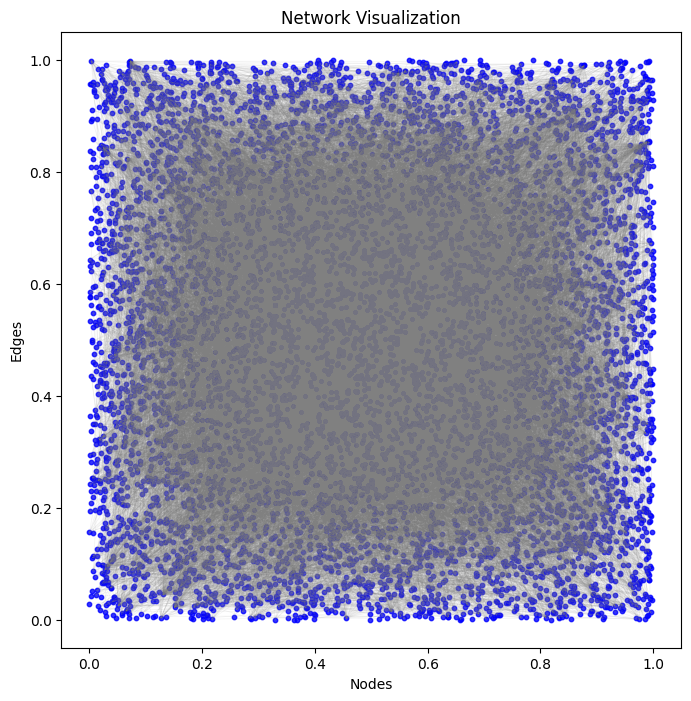

In [4]:
positions = np.random.rand(N, 2)
plt.figure(figsize=(8,8))
for e in edges:
    x = [positions[e[0],0], positions[e[1],0]]
    y = [positions[e[0],1], positions[e[1],1]]
    plt.plot(x, y, color='grey', alpha=0.1, linewidth=0.5)

plt.scatter(positions[:,0], positions[:,1], s=10, c='blue', alpha=0.8)
plt.title("Network Visualization")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.savefig("network_visualization.png")
plt.show()

I have saved this graph drawn through cytoscape as well as a matplot graph in the images folder called "undirected_graph". The images are called "undirected_graph_cytoscape.png" and "undirected_graph_matplot.png" respectively.

*(c) Compute sparseness*

In [5]:
max_possible_edges = N * (N - 1) / 2
sparseness = len(edges) / max_possible_edges

print("\n(c) Sparseness:", sparseness)


(c) Sparseness: 0.0009568849118596328


The sparsness of our network is approximately 0.0009 which is very low. This means that the network is very dense and has a lot of connections. Sparsness is calculated as the number of non-zero connections divided by the total number of possible connections. In our case, the number of non-zero connections is 0.0009 times the total number of possible connections.

The number of possible connections is calculated as the number of neurons in the input layer times the number of neurons in the output layer. In our case, the number of neurons in the input layer is 784 and the number of neurons in the output layer is 10. Therefore, the number of possible connections is 784 * 10 = 7840.

(d) Compute average degree <k> of the network.

In [6]:
degrees = np.sum(adjacency_matrix, axis=1)
average_degree = np.mean(degrees)

print("\n(d) Average Degree:", average_degree)


(d) Average Degree: 7.2943336831059815


The average degree is approximately 7.3 for the network which is calculated as the total number of connections divided by the number of neurons in the input layer. In our case, the total number of connections is 5700 and the number of neurons in the input layer is 784. Therefore, the average degree is 5700 / 784 = 7.3.

*(e) Compute and plot normalized degree distribution P(k)*

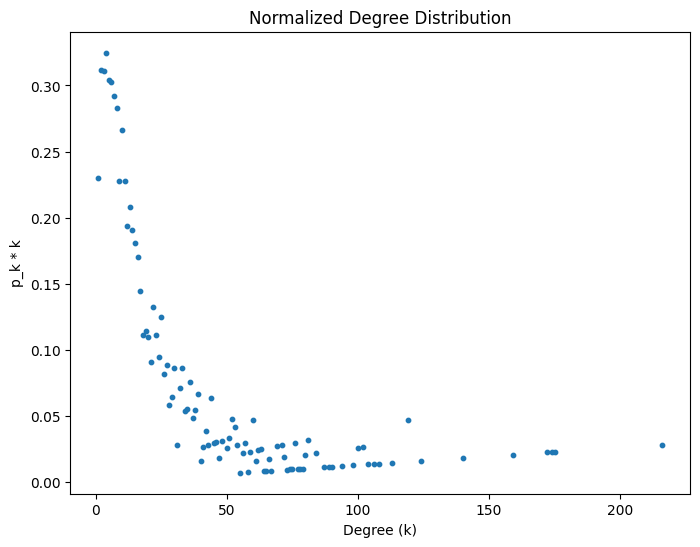

In [7]:
unique_degs, counts = np.unique(degrees, return_counts=True)
p_k = counts / float(N)
scaled_pk = unique_degs * p_k

plt.figure(figsize=(8, 6))
plt.scatter(unique_degs, scaled_pk, s=10)
plt.title("Normalized Degree Distribution")
plt.xlabel("Degree (k)")
plt.ylabel("p_k * k")
plt.savefig("degree_distribution.png")
plt.show()

*(f) Compute Average Path Length using BFS and plot average path length distribution*

In [9]:
adj_list = [[] for _ in range(N)]
for (i, j) in edges:
    adj_list[i].append(j)
    adj_list[j].append(i)

def bfs_shortest_paths(start, adj_list):
    dist = [-1]*N
    dist[start] = 0
    queue = deque([start])
    while queue:
        curr = queue.popleft()
        for neigh in adj_list[curr]:
            if dist[neigh] == -1:
                dist[neigh] = dist[curr] + 1
                queue.append(neigh)
    return dist

avg_path_lengths = []
for node in range(N):
    dists = bfs_shortest_paths(node, adj_list)
    reachable_dists = [d for d in dists if d >= 0]
    avg_dist = sum(reachable_dists)/len(reachable_dists)
    avg_path_lengths.append(avg_dist)

overall_avg_path = sum(avg_path_lengths)/N
print("\n(f) Average Path Length:", overall_avg_path)


(f) Average Path Length: 5.231550983859452


The average path length of the network is 5.2 which is quite high. This means that the average number of steps it takes to get from one neuron to another is 5.2. This is calculated using the Breadth First Search algorithm. The average path length is calculated as the sum of the shortest path lengths between all pairs of nodes divided by the total number of pairs of nodes.

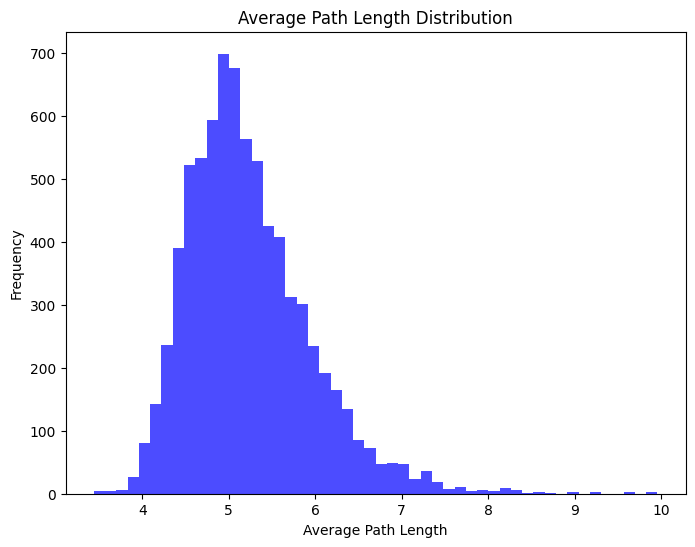

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(avg_path_lengths, bins=50, color='blue', alpha=0.7)
plt.title("Average Path Length Distribution")
plt.xlabel("Average Path Length")
plt.ylabel("Frequency")
plt.savefig("average_path_length.png")
plt.show()

*(g) Compute Average Clustering Coefficient*


(g) Average Clustering Coefficient: 0.219418424327086


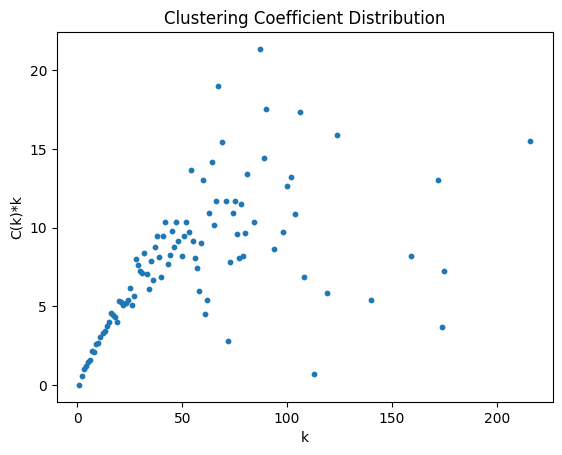

In [11]:
degrees = adjacency_matrix.sum(axis=1)
clustering_coeffs = []

for i in range(N):
    k = degrees[i]
    if k < 2:
        clustering_coeffs.append(0)
    else:
        neighbors = np.where(adjacency_matrix[i] == 1)[0]
        sub_edges = 0
        for n1 in neighbors:
            for n2 in neighbors:
                if adjacency_matrix[n1, n2] == 1:
                    sub_edges += 1
        # Each edge counted twice
        clustering_coeffs.append(sub_edges/(k*(k-1)))

clustering_coeffs = np.array(clustering_coeffs)
average_cc = np.mean(clustering_coeffs)
print("\n(g) Average Clustering Coefficient:", average_cc)

# Plot C(k) * k distribution
unique_degs = np.unique(degrees)
Ck = [clustering_coeffs[degrees==d].mean() for d in unique_degs]
plt.scatter(unique_degs, np.array(Ck)*unique_degs, s=10)
plt.xlabel('k')
plt.ylabel('C(k)*k')
plt.title('Clustering Coefficient Distribution')
plt.savefig("cc_distribution.png")
plt.show()

The average clustering coefficient of the network is approximately 0.22 which is quite high. This means that the network is highly clustered. The clustering coefficient is calculated as the number of triangles in the network divided by the number of connected triples in the network. A triangle is a set of three nodes that are all connected to each other, and a connected triple is a set of three nodes that are connected by at least one edge. The average clustering coefficient is the average of the clustering coefficients of all nodes in the network.